In [14]:
import torch
from torchvision.models import resnet18
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import io

In [15]:
net = resnet18(pretrained=True)
net.eval()
None

In [16]:
def transform_image(image_bytes):
    my_transforms = transforms.Compose([transforms.Resize(255),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(
                                            [0.485, 0.456, 0.406],
                                            [0.229, 0.224, 0.225])])
    image = Image.open(io.BytesIO(image_bytes))
    return my_transforms(image).unsqueeze(0)

Class: 874


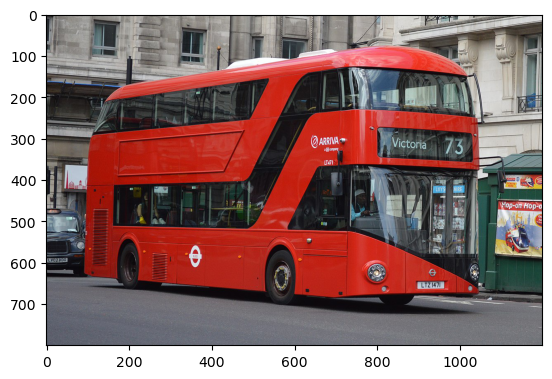

In [29]:
image_path="bus.jpg"
image = plt.imread(image_path)
plt.imshow(image)

with open(image_path, 'rb') as f:
    image_bytes = f.read()
    image_tensor = transform_image(image_bytes=image_bytes)
    output = net(image_tensor)
    probs = torch.nn.functional.softmax(output, dim=1)
    conf, classes = torch.max(probs, 1)
    
print('Class:', classes.item())